**Work in progress**

I'm interested in prescribing of Lidocaine patches since 2015. Details of lidocaine plasters prescribing can be seen on [OpenPrescribing here](https://openprescribing.net/measure/lplidocaine/national/england/). Previous DataLab work on evaluation on the impact of NHS England guidance can be viewed [here in JRSM](https://journals.sagepub.com/doi/10.1177/0141076818808429)

The following example notebooks for reference for re-using code snippets
- https://github.com/ebmdatalab/lidocaine-change-detection-notebook/blob/master/notebooks/ccg-lidocaine-change.ipynb
- https://github.com/ebmdatalab/jupyter-notebooks/blob/master/Dementia%20Prescribing/Dementia%20Prescribing.ipynb
- https://github.com/ebmdatalab/jupyter-notebooks/blob/master/new_measures/Gabapentinoids/New%20Measure%20-%20Gabapentin%20and%20Pregabalin%20DDD.ipynb
- https://github.com/ebmdatalab/cd-legislation-notebook/blob/master/notebooks/legislative.change.ipynb
    

## Data Extraction

- Lidocaine here
- See below for list size (add navigation later)

In [2]:
#import libraries required for analysis
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq, charts, maps
import os

In [3]:
## ensuring the format is consistent for pounds and pence
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
## here we will extract all prescribing of Lidocaine patches by ccg (prev named pct)
sql= '''
SELECT
month,
  pct,
  SUM(quantity) AS quantity_of_plasters,
  SUM(items) AS prescription_items,
  SUM(actual_cost) AS actual_cost,
  SUM(net_cost) AS net_cost
FROM
  ebmdatalab.hscic.normalised_prescribing_standard AS rx
  INNER JOIN hscic.ccgs AS ccg ON rx.pct = ccg.code 
WHERE
  bnf_code LIKE "1502010J0%EL" # brand and Lidocaine patches
  AND month >= "2015-01-01"
  AND ccg.org_type = 'CCG' #restrict to only ccg orgs i.e. exclude OOH etc
GROUP BY
   month,
   pct
 '''

df_lidocaine = bq.cached_read(sql, csv_path=os.path.join('..', 'data','lidocaine.csv'))
df_lidocaine.head(10)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=qHexadQuorfvlV0YboZEL8ajLwXm7L&prompt=consent&access_type=offline


Enter the authorization code:  4/1AX4XfWgL96Zt7PN9AwAT3WlNNChQVXAwNPGi2TSz98gTcCT9CDAjUVF4lq0


Downloading: 100%|██████████| 6360/6360 [00:00<00:00, 7815.47rows/s]


,month,pct,quantity_of_plasters,prescription_items,actual_cost,net_cost
0,2015-12-01 00:00:00+00:00,06K,3005,97,6708.64,7252.05
1,2015-12-01 00:00:00+00:00,D9Y0V,18155,596,40531.10,43813.94
2,2016-07-01 00:00:00+00:00,05V,1440,48,3221.69,3475.19
3,2016-07-01 00:00:00+00:00,A3A8R,8580,299,19199.40,20706.48
4,2016-07-01 00:00:00+00:00,15C,3055,88,6835.06,7372.71
5,2016-05-01 00:00:00+00:00,91Q,17880,579,40032.67,43150.37
6,2016-05-01 00:00:00+00:00,D4U1Y,3305,106,7385.00,7976.06
7,2016-04-01 00:00:00+00:00,84H,26745,901,59760.98,64544.44
8,2016-04-01 00:00:00+00:00,03K,1110,33,2479.23,2678.80
9,2016-04-01 00:00:00+00:00,72Q,45235,1489,101079.04,109167.19


## Charts
Here we will draw some charts to ilustrate national patterns

(0, 800000)

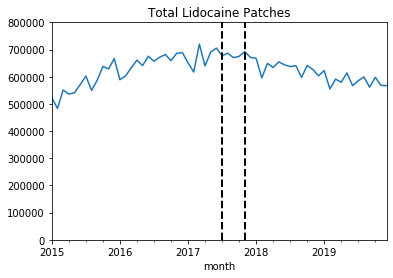

In [5]:
# total number of patches
ax = df_lidocaine.groupby(["month"])['quantity_of_plasters'].sum().plot(kind='line', title="Total Lidocaine Patches")
ax.axvline(pd.to_datetime('2017-07-01'), color='black', linestyle='--', lw=2) ##policy announced
ax.axvline(pd.to_datetime('2017-11-01'), color='black', linestyle='--', lw=2) ##consultation implemented
plt.ylim(0, 800000)

(0, 1635934.2611649998)

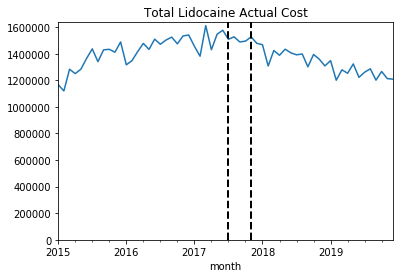

In [6]:
# total actual cost
ax = df_lidocaine.groupby(["month"])['actual_cost'].sum().plot(kind='line', title="Total Lidocaine Actual Cost")
ax.axvline(pd.to_datetime('2017-07-01'), color='black', linestyle='--', lw=2) ##policy announced
ax.axvline(pd.to_datetime('2017-11-01'), color='black', linestyle='--', lw=2) ##consultation implemented
plt.ylim(0, )

In [7]:
# total net cost

In [ ]:
ax = df_lidocaine.groupby(["month"])['net_cost'].sum().plot(kind='line', title="Total Lidocaine Net Cost")
ax.axvline(pd.to_datetime('2017-07-01'), color='black', linestyle='--', lw=2) ##policy announced
ax.axvline(pd.to_datetime('2017-11-01'), color='black', linestyle='--', lw=2) ##consultation implemented
plt.ylim(0, )